# CURSO DE ESTATÍSTICA - PARTE 1

In [148]:
import pandas as pd

In [149]:
import numpy as np

In [150]:
import seaborn as sns

# 1 CONHECENDO OS DADOS

## 1.1 Dataset do projeto

### Pesquisa Nacional por Amostra de Domicílios - 2015

A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

### Renda
> Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade
> Idade do morador na data de referência em anos.

### Altura (elaboração artificial para fins de estudo)
> Altura do morador em metros.

### UF
> |Código|Descrição|
> |---|---|
> |11|Rondônia|
> |12|Acre|
> |13|Amazonas|
> |14|Roraima|
> |15|Pará|
> |16|Amapá|
> |17|Tocantins|
> |21|Maranhão|
> |22|Piauí|
> |23|Ceará|
> |24|Rio Grande do Norte|
> |25|Paraíba|
> |26|Pernambuco|
> |27|Alagoas|
> |28|Sergipe|
> |29|Bahia|
> |31|Minas Gerais|
> |32|Espírito Santo|
> |33|Rio de Janeiro|
> |35|São Paulo|
> |41|Paraná|
> |42|Santa Catarina|
> |43|Rio Grande do Sul|
> |50|Mato Grosso do Sul|
> |51|Mato Grosso|
> |52|Goiás|
> |53|Distrito Federal|

### Sexo
> |Código|Descrição|
> |---|---|
> |0|Masculino|
> |1|Feminino|

### Anos de Estudo
> |Código|Descrição|
> |---|---|
> |1|Sem instrução e menos de 1 ano|
> |2|1 ano|
> |3|2 anos|
> |4|3 anos|
> |5|4 anos|
> |6|5 anos|
> |7|6 anos|
> |8|7 anos|
> |9|8 anos|
> |10|9 anos|
> |11|10 anos|
> |12|11 anos|
> |13|12 anos|
> |14|13 anos|
> |15|14 anos|
> |16|15 anos ou mais|
> |17|Não determinados|
> ||Não aplicável|

### Cor
> |Código|Descrição|
> |---|---|
> |0|Indígena|
> |2|Branca|
> |4|Preta|
> |6|Amarela|
> |8|Parda|
> |9|Sem declaração|

#### Observação
> Os seguintes tratamentos foram realizados nos dados originais:

> 1. Foram eliminados os registros onde a Renda era inválida (999 999 999 999);

> 2. Foram eliminados os registros onde a Renda era missing;

> 3. Foram considerados somente os registros das Pessoas de Referência de cada domicílio (responsável pelo domicílio).

### Importando bibliotecas

* https://pandas.pydata.org/
* https://www.numpy.org/
* https://seaborn.pydata.org/

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns

### Lendo o dataset do projeto

In [152]:
caminho = 'https://raw.githubusercontent.com/bruno-kalel/lab-math-stats/refs/heads/main/stats-with-python/data/dados.csv'

In [153]:
dados = pd.read_csv(caminho)

In [154]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [155]:
dados.tail()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


In [156]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [157]:
dados.columns = dados.columns.str.lower().str.replace(' ', '_').str.strip()
dados.columns

Index(['uf', 'sexo', 'idade', 'cor', 'anos_de_estudo', 'renda', 'altura'], dtype='object')

## 1.2 Tipos de dados

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [158]:
sorted(dados.anos_de_estudo.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [159]:
sorted(dados.uf.unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [160]:
sorted(dados.sexo.unique())

[0, 1]

In [161]:
sorted(dados.cor.unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [162]:
dados.idade.min()

13

In [163]:
dados.idade.max()

99

#### Observação

> A variável idade pode ser classificada de três formas distintas:

> 1. QUANTITATIVA DISCRETA - quando representa anos completos (números inteiros);

> 2. QUANTITATIVA CONTÍNUA - quando representa a idade exata, sendo representado por frações de anos; e

> 3. QUALITATIVA ORDINAL - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [164]:
dados.altura.min()

1.339244614

In [165]:
dados.altura.max()

2.028496765

### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# 2 DISTRIBUIÇÃO DE FREQUÊNCIAS

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## 2.1 Distribuição de frequências para variáveis qualitativas

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [166]:
# variáveis qualitativas
# naturalmente categorizadas

dados.sexo.value_counts()

,count
sexo,
0,53250
1,23590


In [167]:
# percentual

dados.sexo.value_counts(normalize=True) * 100

,proportion
sexo,
0,69.299844
1,30.700156


In [168]:
frequência = dados.sexo.value_counts()

In [169]:
percentual = dados.sexo.value_counts(normalize=True) * 100

In [170]:
dist_freq_qualitativas = pd.DataFrame({'frequência':frequência, 'porcentagem %':percentual})

In [171]:
dist_freq_qualitativas

,frequência,porcentagem %
sexo,,
0,53250,69.299844
1,23590,30.700156


In [172]:
dist_freq_qualitativas.rename(index={0:'masculino', 1:'feminino'}, inplace=True)

In [173]:
dist_freq_qualitativas

,frequência,porcentagem %
sexo,,
masculino,53250,69.299844
feminino,23590,30.700156


In [174]:
dist_freq_qualitativas.rename_axis('sexo', axis='columns', inplace=True)

In [175]:
dist_freq_qualitativas

sexo,frequência,porcentagem %
sexo,,
masculino,53250,69.299844
feminino,23590,30.700156


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [176]:
dict_sexo = {0: 'Masculino',
             1: 'Feminino'}

dict_cor = {0: 'Indígena',
            2: 'Branca',
            4: 'Preta',
            6: 'Amarela',
            8: 'Parda',
            9: 'Sem declaração'}

In [177]:
frequência = pd.crosstab(dados.sexo, dados.cor)
frequência

cor,0,2,4,6,8
sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [178]:
frequência.rename(index=dict_sexo, columns=dict_cor, inplace=True)

In [179]:
frequência

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [180]:
percentual = pd.crosstab(dados.sexo, dados.cor, normalize=True)
percentual.rename(index=dict_sexo, columns=dict_cor, inplace=True)
percentual

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


In [181]:
# agregações de acordo com uma determinada função usando outra variável dentro do cruzamento

percentual = pd.crosstab(dados.sexo, dados.cor, aggfunc='mean', values=dados.renda)
percentual.rename(index=dict_sexo, columns=dict_cor, inplace=True)
percentual

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [182]:
# homens brancos e amarelos possuem a maior média de renda
# enquanto as mulheres negras e pardas recebem o menor rendimento

## 2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> - Acima de 20 SM

<b>B</b> - De 10 a 20 SM

<b>C</b> - De 4 a 10 SM

<b>D</b> - De 2 a 4 SM

<b>E</b> - Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> - Acima de 15.760

<b>B</b> - De 7.880 a 15.760

<b>C</b> - De 3.152 a 7.880

<b>D</b> - De 1.576 a 3.152

<b>E</b> - Até 1.576


In [183]:
dados.renda.min()

0

In [184]:
# outlier?

dados.renda.max()

200000

In [185]:
classes = [dados.renda.min(), 1576, 3152, 7880, 15760, dados.renda.max()]

In [186]:
labels = ['classe e', 'classe d', 'classe c', 'classe b', 'classe a']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [187]:
dados.head()

,uf,sexo,idade,cor,anos_de_estudo,renda,altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [188]:
pd.cut(x=dados.renda, bins=classes, labels=labels, include_lowest=True)

,renda
0,classe e
1,classe e
2,classe e
3,classe c
4,classe e
...,...
76835,classe e
76836,classe e
76837,classe e
76838,classe e


In [189]:
frequência = pd.value_counts(pd.cut(x=dados.renda, bins=classes, labels=labels, include_lowest=True))
frequência

<ipython-input-189-52b984b1e3d2>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequência = pd.value_counts(pd.cut(x=dados.renda, bins=classes, labels=labels, include_lowest=True))


,count
renda,
classe e,49755
classe d,16700
classe c,7599
classe b,2178
classe a,608


In [190]:
percentual = pd.value_counts(pd.cut(x=dados.renda, bins=classes, labels=labels, include_lowest=True), normalize=True)
percentual

<ipython-input-190-c1893f96e973>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(pd.cut(x=dados.renda, bins=classes, labels=labels, include_lowest=True), normalize=True)


,proportion
renda,
classe e,0.647514
classe d,0.217335
classe c,0.098894
classe b,0.028345
classe a,0.007913


In [191]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'frequência':frequência, 'percentual':percentual})
dist_freq_quantitativas_personalizadas

,frequência,percentual
renda,,
classe e,49755,0.647514
classe d,16700,0.217335
classe c,7599,0.098894
classe b,2178,0.028345
classe a,608,0.007913


In [192]:
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

,frequência,percentual
renda,,
classe a,608,0.007913
classe b,2178,0.028345
classe c,7599,0.098894
classe d,16700,0.217335
classe e,49755,0.647514


## 2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

#### $$k = 1 + \frac {10}{3}\log_{10}n$$

In [193]:
n = dados.shape
n

(76840, 7)

In [194]:
n = dados.shape[0]
n

76840

In [195]:
k = 1 + (10 / 3) * np.log10(n)
k

17.285291187298853

In [196]:
k = int(k.round(0))
k

17

### Passo 2 - Criar a tabela de frequências

In [197]:
frequência = pd.value_counts(pd.cut(x=dados.renda, bins=k, include_lowest=True), sort=False)
frequência

<ipython-input-197-cb7364452902>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequência = pd.value_counts(pd.cut(x=dados.renda, bins=k, include_lowest=True), sort=False)


,count
renda,
"(-200.001, 11764.706]",75594
"(11764.706, 23529.412]",1022
"(23529.412, 35294.118]",169
"(35294.118, 47058.824]",19
"(47058.824, 58823.529]",16
"(58823.529, 70588.235]",5
"(70588.235, 82352.941]",4
"(82352.941, 94117.647]",1
"(94117.647, 105882.353]",6


In [198]:
percentual = pd.value_counts(pd.cut(x=dados.renda, bins=k, include_lowest=True), sort=False, normalize=True)
percentual

<ipython-input-198-7c3b22248199>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(pd.cut(x=dados.renda, bins=k, include_lowest=True), sort=False, normalize=True)


,proportion
renda,
"(-200.001, 11764.706]",0.983784
"(11764.706, 23529.412]",0.013300
"(23529.412, 35294.118]",0.002199
"(35294.118, 47058.824]",0.000247
"(47058.824, 58823.529]",0.000208
"(58823.529, 70588.235]",0.000065
"(70588.235, 82352.941]",0.000052
"(82352.941, 94117.647]",0.000013
"(94117.647, 105882.353]",0.000078


In [199]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame({'frequência':frequência, 'porcentagem %':percentual})
dist_freq_quantitativas_amplitude_fixa

,frequência,porcentagem %
renda,,
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078


In [200]:
labels = []

for _ in range (1, 18):
  labels.append(f'classe {_}')

labels

['classe 1',
 'classe 2',
 'classe 3',
 'classe 4',
 'classe 5',
 'classe 6',
 'classe 7',
 'classe 8',
 'classe 9',
 'classe 10',
 'classe 11',
 'classe 12',
 'classe 13',
 'classe 14',
 'classe 15',
 'classe 16',
 'classe 17']

In [201]:
frequência = pd.value_counts(pd.cut(x=dados.renda, bins=k, labels=labels, include_lowest=True), sort=False)
frequência

<ipython-input-201-2b239ef81708>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequência = pd.value_counts(pd.cut(x=dados.renda, bins=k, labels=labels, include_lowest=True), sort=False)


,count
renda,
classe 1,75594
classe 2,1022
classe 3,169
classe 4,19
classe 5,16
classe 6,5
classe 7,4
classe 8,1
classe 9,6


In [202]:
percentual = pd.value_counts(pd.cut(x=dados.renda, bins=k, labels=labels, include_lowest=True), sort=False, normalize=True)
percentual

<ipython-input-202-ce2ecd3bab6a>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(pd.cut(x=dados.renda, bins=k, labels=labels, include_lowest=True), sort=False, normalize=True)


,proportion
renda,
classe 1,0.983784
classe 2,0.013300
classe 3,0.002199
classe 4,0.000247
classe 5,0.000208
classe 6,0.000065
classe 7,0.000052
classe 8,0.000013
classe 9,0.000078


In [203]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame({'frequência':frequência, 'porcentagem %':percentual})
dist_freq_quantitativas_amplitude_fixa

,frequência,porcentagem %
renda,,
classe 1,75594,0.983784
classe 2,1022,0.013300
classe 3,169,0.002199
classe 4,19,0.000247
classe 5,16,0.000208
classe 6,5,0.000065
classe 7,4,0.000052
classe 8,1,0.000013
classe 9,6,0.000078


## 2.4 Histograma

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

<ipython-input-204-5d4518fde46e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.altura)


<Axes: title={'center': 'distribuição de frequências - altura'}, xlabel='metros', ylabel='Density'>

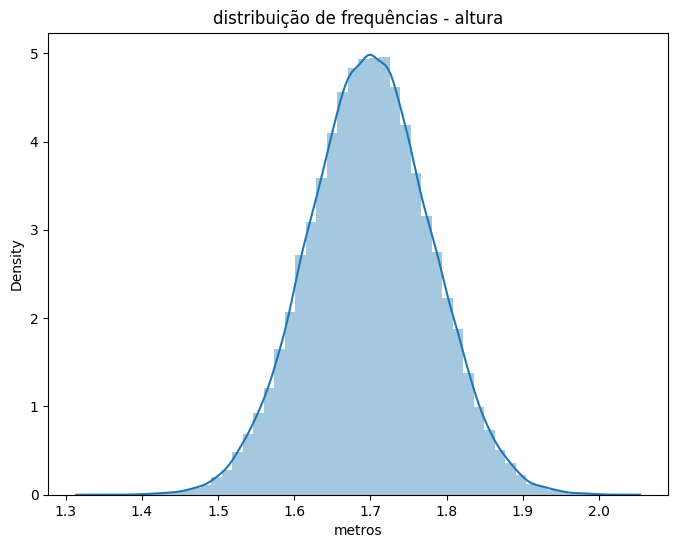

In [204]:
# se não criarmos a distribuição de frequência
# sns cria pra gente as classes e também o gráfico

ax = sns.distplot(dados.altura)
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências - altura')
ax.set_xlabel('metros')
ax

<Axes: >

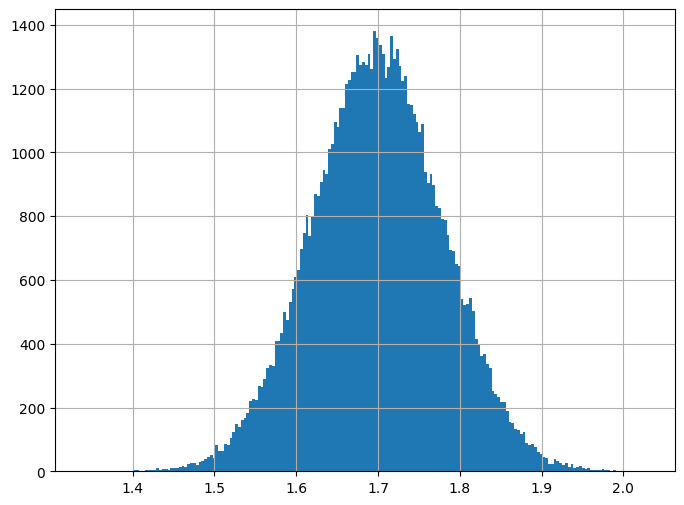

In [205]:
dados.altura.hist(bins=200, figsize=(8, 6))

In [206]:
dist_freq_quantitativas_personalizadas

,frequência,percentual
renda,,
classe e,49755,0.647514
classe d,16700,0.217335
classe c,7599,0.098894
classe b,2178,0.028345
classe a,608,0.007913


<Axes: xlabel='renda'>

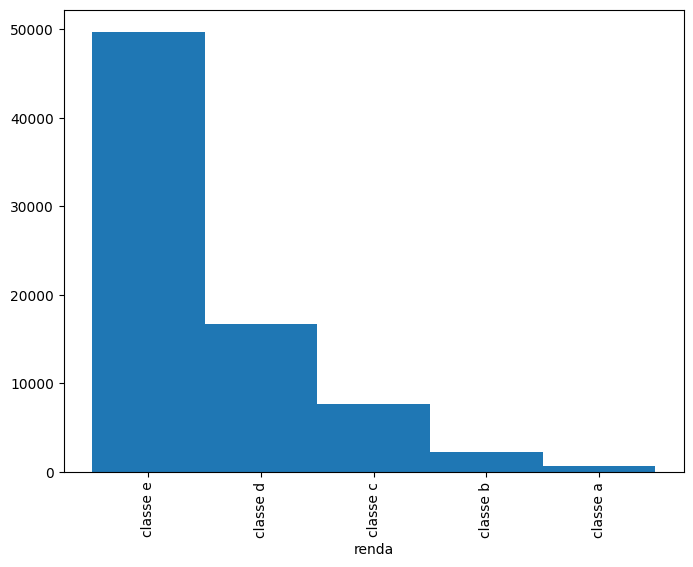

In [207]:
# histograma da nossa distribuição de frequência

dist_freq_quantitativas_personalizadas.frequência.plot.bar(width=1, figsize=(8, 6))

<ipython-input-208-7554f7b5d71e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.renda)


<Axes: title={'center': 'distribuição de frequências - renda'}, xlabel='reais', ylabel='Density'>

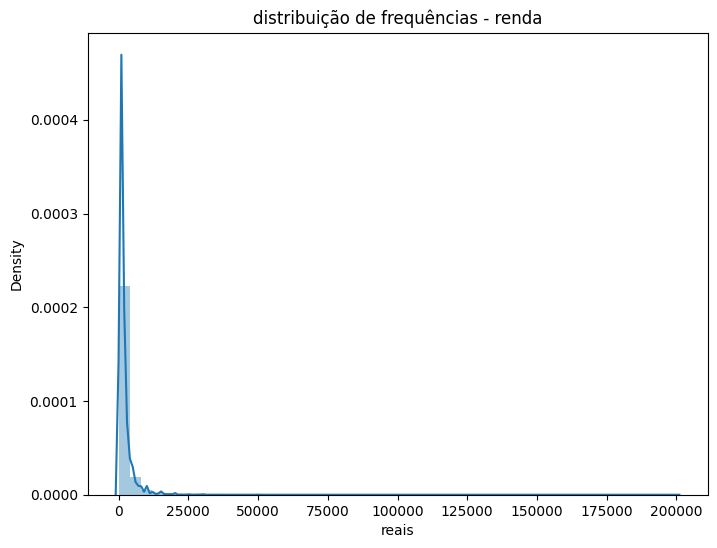

In [208]:
# se não criarmos a distribuição de frequência
# sns cria pra gente as classes e também o gráfico
# exemplo com distribuição de frequência de renda

ax = sns.distplot(dados.renda)
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências - renda')
ax.set_xlabel('reais')
ax

# 3 MEDIDAS DE TENDÊNCIA CENTRAL

## DataFrame de exemplo

In [209]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8], 'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10], 'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática', 'Português', 'Inglês', 'Geografia', 'História', 'Física', 'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## 3.1 Média aritmética

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

## $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [210]:
(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7

7.714285714285714

In [211]:
df.Fulano.mean()

7.714285714285714

In [212]:
dados.renda.mean()

2000.3831988547631

In [213]:
dados.head()

,uf,sexo,idade,cor,anos_de_estudo,renda,altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [214]:
dados.groupby(dados.sexo).renda.mean()

,renda
sexo,
0,2192.441596
1,1566.847393


In [215]:
dataset = pd.DataFrame({'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
                        'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]})

In [216]:
dataset.Idade.mean()

46.1

In [217]:
dataset.groupby(dataset.Sexo).Idade.mean()

,Idade
Sexo,
H,45.750000
M,46.333333


## 3.2 Mediana

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


## $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


## $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


## $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


## $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

In [218]:
notas_fulano = df.Fulano
notas_fulano

,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [219]:
notas_fulano = notas_fulano.sort_values()
notas_fulano

,Fulano
Inglês,4
História,6
Matemática,8
Geografia,8
Química,8
Português,10
Física,10


In [220]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [221]:
n = notas_fulano.shape[0]
n

7

In [222]:
elemento_md = (n + 1) / 2
elemento_md

4.0

In [223]:
notas_fulano.loc[elemento_md - 1]

,3
index,Geografia
Fulano,8


In [224]:
notas_fulano.median(numeric_only=True)

,0
Fulano,8.0


### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

In [225]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [226]:
notas_beltrano = df.Beltrano.sample(6, random_state=101)
notas_beltrano

,Beltrano
Matemática,10.0
Inglês,0.5
Física,9.5
História,3.0
Química,10.0
Português,2.0


In [227]:
notas_beltrano.median(numeric_only=True)

6.25

### Obtendo a mediana em nosso dataset

In [228]:
dados.renda.median()

1200.0

In [229]:
# por default, q=0.5, logo, a mediana

dados.renda.quantile()

1200.0

## 3.3 Moda

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [230]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [231]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [232]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])
exemplo

,0
0,1
1,2
2,2
3,3
4,4
5,4
6,5
7,6
8,6


In [233]:
# multimodal

exemplo.mode()

,0
0,2
1,4
2,6


### Obtendo a moda em nosso dataset

In [234]:
dados.renda.mode()

,renda
0,788


In [235]:
# moda em valor contínuo não representa muita coisa, pois há muitas

dados.altura.mode()

,altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


## 3.4 Relação entre média, mediana e moda

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

<ipython-input-236-076e9aed70dc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.renda[dados.renda < 10000])


<Axes: xlabel='renda', ylabel='Density'>

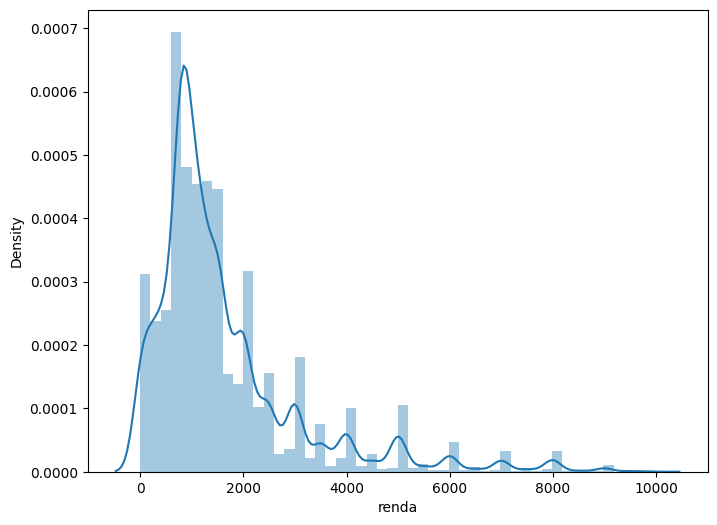

In [236]:
ax = sns.distplot(dados.renda[dados.renda < 10000])
ax.figure.set_size_inches(8, 6)
ax

In [237]:
Moda = dados.renda.mode()
Moda

,renda
0,788


In [238]:
Mediana = dados.renda.median()
Mediana

1200.0

In [239]:
Média = dados.renda.mean()
Média

2000.3831988547631

In [240]:
Moda[0] < Mediana < Média

True

### Avaliando a variável ALTURA

<ipython-input-241-8741fdd43121>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.altura)


<Axes: xlabel='altura', ylabel='Density'>

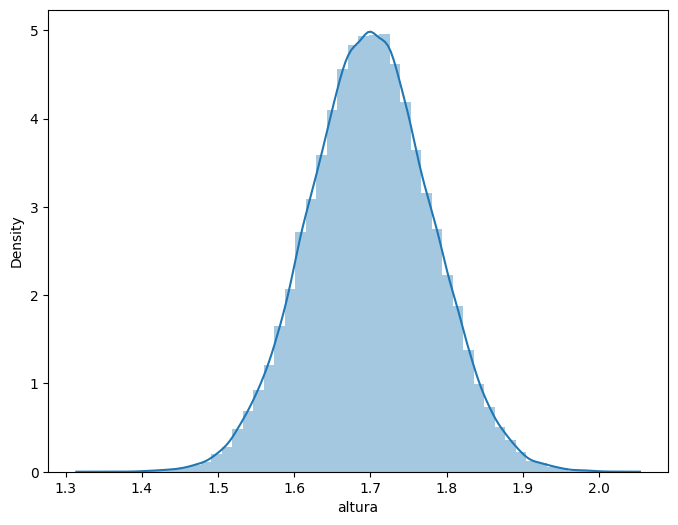

In [241]:
ax = sns.distplot(dados.altura)
ax.figure.set_size_inches(8, 6)
ax

In [242]:
# ser multimodal é uma característica muito forte de variáveis contínuas

Moda = dados.altura.mode()
Moda

,altura
0,1.568128
1,1.671225
2,1.681659
3,1.692977
4,1.708163
5,1.708370
6,1.753842
7,1.779073
8,1.796462


In [243]:
Mediana = dados.altura.median()
Mediana

1.6993247325

In [244]:
Média = dados.altura.mean()
Média

1.6995124540575741

### Avaliando a variável ANOS DE ESTUDO

<ipython-input-245-ff45b728da1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.anos_de_estudo, bins=17)


<Axes: xlabel='anos_de_estudo', ylabel='Density'>

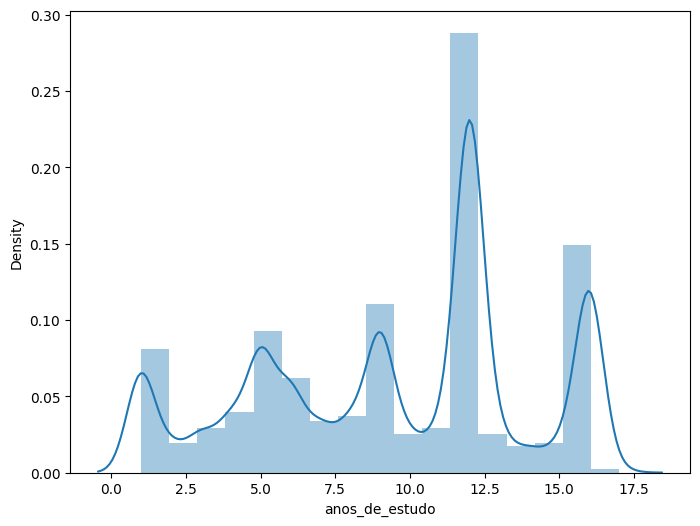

In [245]:
ax = sns.distplot(dados.anos_de_estudo, bins=17)
ax.figure.set_size_inches(8, 6)
ax

In [246]:
Moda = dados.anos_de_estudo.mode()
Moda

,anos_de_estudo
0,12


In [247]:
Mediana = dados.anos_de_estudo.median()
Mediana

11.0

In [248]:
Média = dados.anos_de_estudo.mean()
Média

9.469664237376367

In [249]:
Moda[0] > Mediana > Média

True

# 4 MEDIDAS SEPARATRIZES

## 4.1 Quartis, decis e percentis

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

In [250]:
# por default, q=0.5, logo, a mediana

dados.renda.quantile()

1200.0

In [251]:
dados.renda.quantile([0.25, 0.5, 0.75])

,renda
0.25,788.0
0.50,1200.0
0.75,2000.0


In [252]:
dados.renda.quantile([i / 10 for i in range (1, 10)])

,renda
0.1,350.0
0.2,788.0
0.3,800.0
0.4,1000.0
0.5,1200.0
0.6,1500.0
0.7,1900.0
0.8,2500.0
0.9,4000.0


In [253]:
dados.renda.quantile([i / 100 for i in range (1, 100)])

,renda
0.01,0.0
0.02,0.0
0.03,0.0
0.04,50.0
0.05,100.0
...,...
0.95,6000.0
0.96,7000.0
0.97,8000.0
0.98,10000.0


<ipython-input-107-0370216e933c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.idade, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})


<Axes: title={'center': 'distribuição de frequências acumulada'}, xlabel='anos', ylabel='acumulado'>

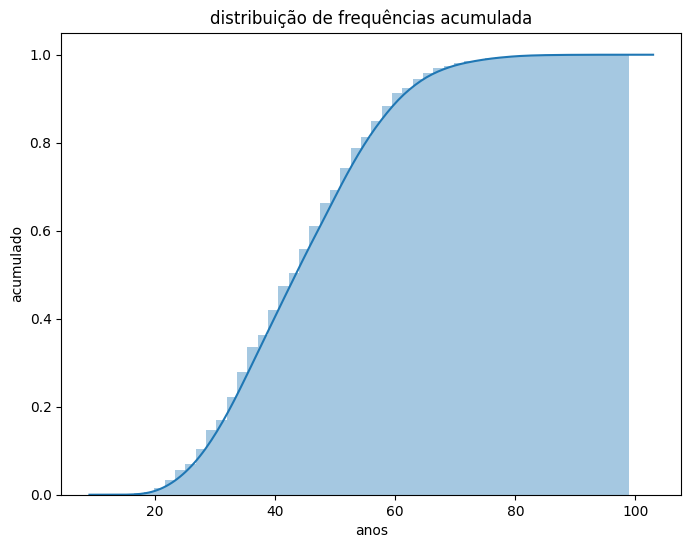

In [107]:
ax = sns.distplot(dados.idade, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências acumulada')
ax.set_ylabel('acumulado')
ax.set_xlabel('anos')
ax

<ipython-input-108-97a8751f5945>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.idade, hist_kws={'cumulative':True}, kde_kws={'cumulative':True}, bins=10)


<Axes: title={'center': 'distribuição de frequências acumulada'}, xlabel='anos', ylabel='acumulado'>

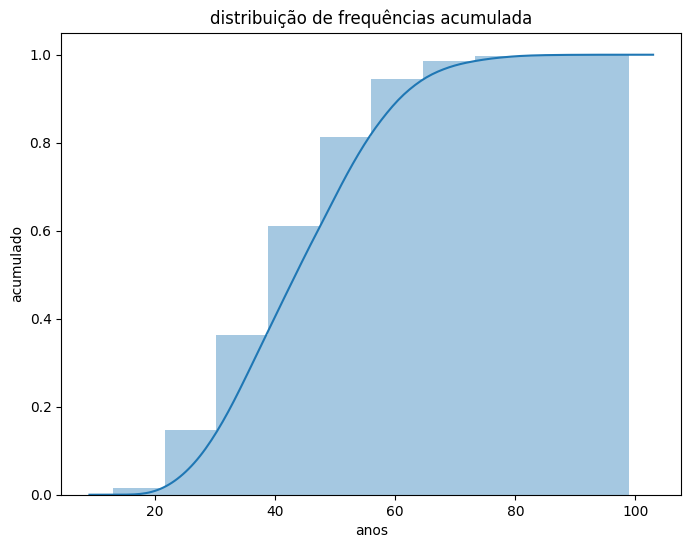

In [108]:
ax = sns.distplot(dados.idade, hist_kws={'cumulative':True}, kde_kws={'cumulative':True}, bins=10)
ax.figure.set_size_inches(8, 6)
ax.set_title('distribuição de frequências acumulada')
ax.set_ylabel('acumulado')
ax.set_xlabel('anos')
ax

In [109]:
dados.idade.quantile([i / 10 for i in range (1, 10)])

,idade
0.1,28.0
0.2,33.0
0.3,36.0
0.4,40.0
0.5,43.0
0.6,47.0
0.7,51.0
0.8,55.0
0.9,61.0


## 4.2 Box-plot

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<Axes: title={'center': 'altura'}, xlabel='metros'>

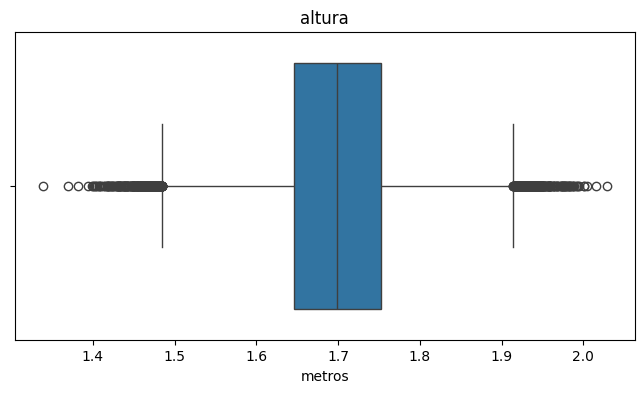

In [110]:
ax = sns.boxplot(x=dados.altura, data=dados, orient='h')
ax.figure.set_size_inches(8, 4)
ax.set_title('altura')
ax.set_xlabel('metros')
ax

<Axes: title={'center': 'altura'}, xlabel='metros', ylabel='sexo'>

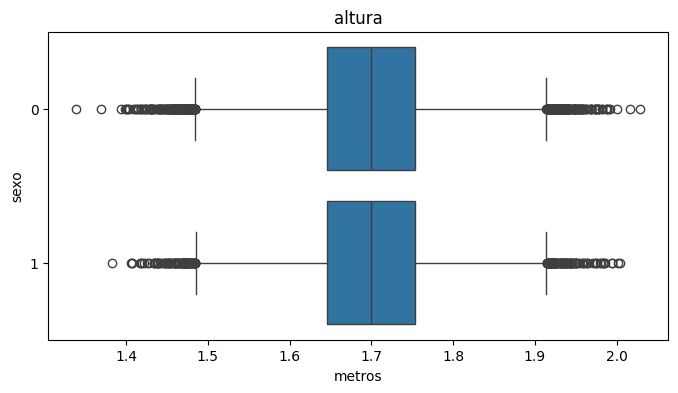

In [111]:
# caso fosse uma variável verdadeira, teríamos uma diferença significativa de altura entre h e m
# como essa variável é um fake, não tiramos conclusão nenhuma dela

ax = sns.boxplot(x=dados.altura, y=dados.sexo, data=dados, orient='h')
ax.figure.set_size_inches(8, 4)
ax.set_title('altura')
ax.set_xlabel('metros')
ax

<Axes: title={'center': 'renda'}, xlabel='reais'>

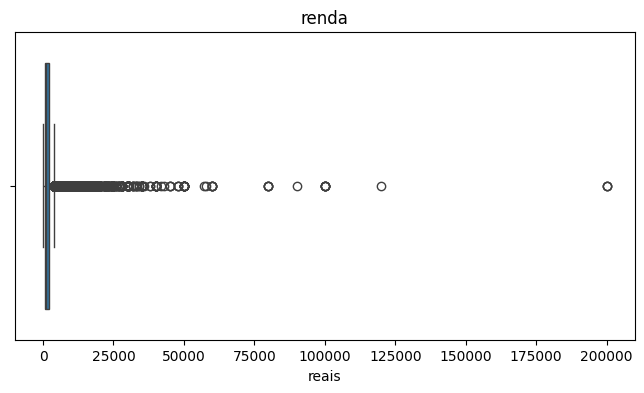

In [112]:
ax = sns.boxplot(x=dados.renda, data=dados, orient='h')
ax.figure.set_size_inches(8, 4)
ax.set_title('renda')
ax.set_xlabel('reais')
ax

<Axes: title={'center': 'renda'}, xlabel='reais'>

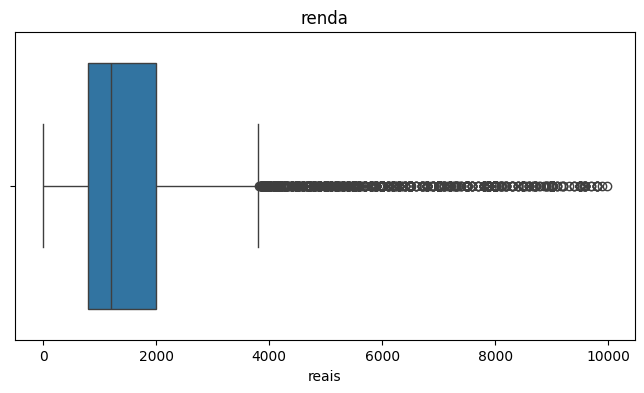

In [113]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], data=dados, orient='h')
ax.figure.set_size_inches(8, 4)
ax.set_title('renda')
ax.set_xlabel('reais')
ax

<Axes: title={'center': 'renda'}, xlabel='reais', ylabel='sexo'>

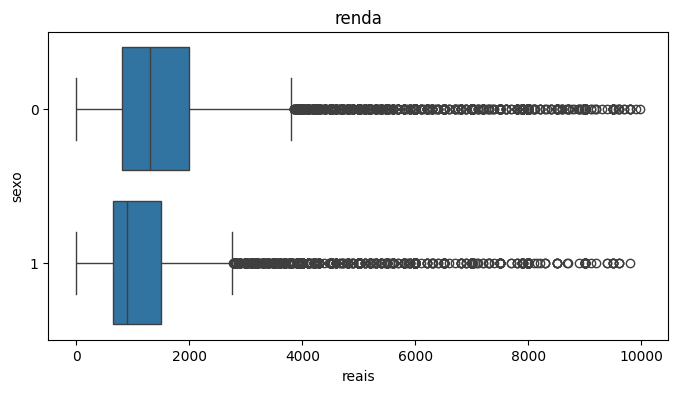

In [114]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], y=dados.sexo, data=dados, orient='h')
ax.figure.set_size_inches(8, 4)
ax.set_title('renda')
ax.set_xlabel('reais')
ax

<Axes: title={'center': 'anos de estudo'}, xlabel='anos'>

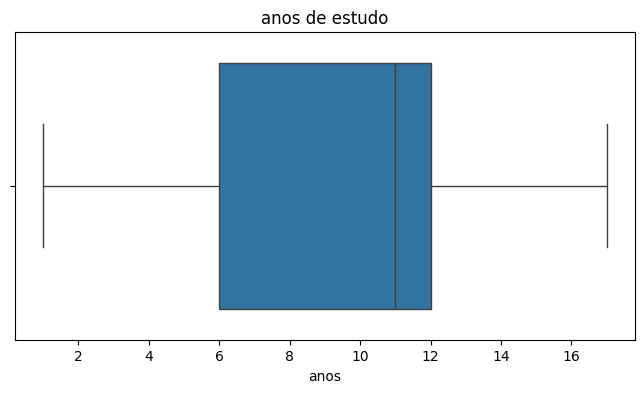

In [115]:
ax = sns.boxplot(x=dados.anos_de_estudo, data=dados, orient='h')
ax.figure.set_size_inches(8, 4)
ax.set_title('anos de estudo')
ax.set_xlabel('anos')
ax

<Axes: title={'center': 'anos de estudo'}, xlabel='anos', ylabel='sexo'>

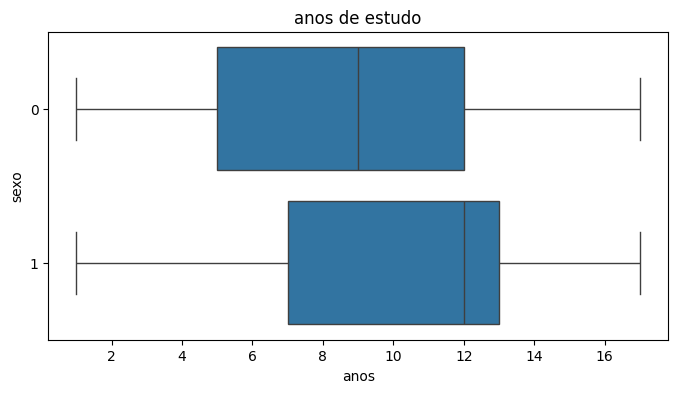

In [116]:
ax = sns.boxplot(x=dados.anos_de_estudo, y=dados.sexo, data=dados, orient='h')
ax.figure.set_size_inches(8, 4)
ax.set_title('anos de estudo')
ax.set_xlabel('anos')
ax

In [117]:
# mulheres pra cima na educação e pra baixo no nível de renda

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

<Axes: title={'center': 'renda (reais) - bahia x são paulo'}, xlabel='reais', ylabel='uf'>

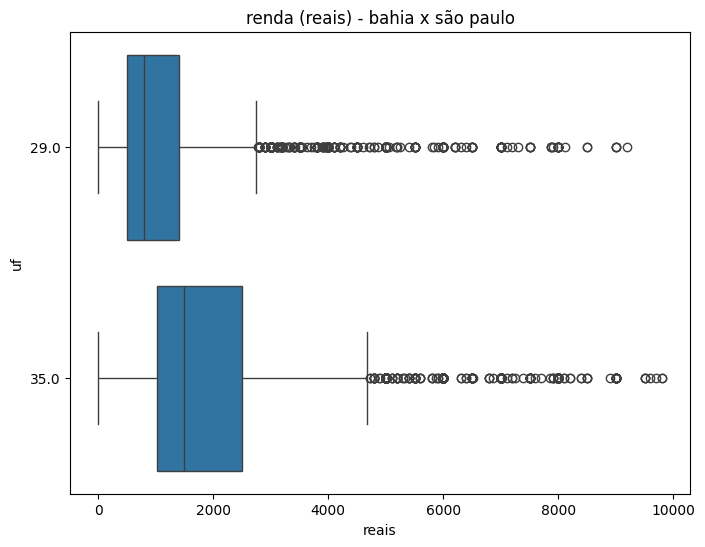

In [118]:
ax = sns.boxplot(x=dados.renda[dados.renda < 10000], y=dados.uf[(dados.uf==35) | (dados.uf ==29)], data=dados, orient='h')
ax.figure.set_size_inches(8, 6)
ax.set_title('renda (reais) - bahia x são paulo')
ax.set_xlabel('reais')
ax

# 5 MEDIDAS DE DISPERSÃO

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## 5.1 Desvio médio absoluto


## $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [119]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [120]:
# dois alunos possuem a mesma nota média
# um é mais constante e outro leva mais a sério algumas matérias ante outras

df.mean()

,0
Matérias,
Fulano,7.714286
Beltrano,5.142857
Sicrano,7.714286


In [121]:
df.median()

,0
Matérias,
Fulano,8.0
Beltrano,3.0
Sicrano,8.0


In [122]:
notas_fulano = df.Fulano
notas_fulano

,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [123]:
notas_fulano = pd.DataFrame(notas_fulano)
notas_fulano

,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [124]:
nota_média_fulano = notas_fulano.mean()
nota_média_fulano

,0
Fulano,7.714286


In [125]:
notas_fulano['Desvio'] = notas_fulano.Fulano - nota_média_fulano[0]
notas_fulano

<ipython-input-125-fea3b0dff0a3>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  notas_fulano['Desvio'] = notas_fulano.Fulano - nota_média_fulano[0]


,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [126]:
notas_fulano['Módulo_Desvio'] = abs(notas_fulano['Desvio'])
notas_fulano

,Fulano,Desvio,Módulo_Desvio
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [127]:
notas_fulano.Módulo_Desvio.mean()

1.5510204081632648

In [128]:
desvio_médio_absoluto = (notas_fulano.Fulano - notas_fulano.Fulano.mean()).abs().mean()
desvio_médio_absoluto

1.5510204081632648

In [129]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [130]:
(df - df.mean()).abs().mean()

,0
Matérias,
Fulano,1.551020
Beltrano,4.020408
Sicrano,0.469388


## 5.2 Variância

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

### $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

### $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [131]:
notas_fulano['Desvio_Ao_Quadrado'] = notas_fulano['Desvio'].pow(2)
notas_fulano

,Fulano,Desvio,Módulo_Desvio,Desvio_Ao_Quadrado
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [132]:
notas_fulano.shape

(7, 4)

In [133]:
len(notas_fulano)

7

In [134]:
len(notas_fulano.columns)

4

In [135]:
notas_fulano['Desvio_Ao_Quadrado'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [136]:
variância = notas_fulano.Fulano.var()
variância

4.57142857142857

## 5.3 Desvio padrão

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

### $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

### $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [137]:
np.sqrt(variância)

2.1380899352993947

In [138]:
# std = desvio padrão amostral (/ n - 1)

desvio_padrão = notas_fulano.Fulano.std()
desvio_padrão

2.1380899352993947

In [139]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [140]:
# fulano == sicrano

df.mean()

,0
Matérias,
Fulano,7.714286
Beltrano,5.142857
Sicrano,7.714286


In [141]:
# fulano == sicrano

df.mean()

,0
Matérias,
Fulano,7.714286
Beltrano,5.142857
Sicrano,7.714286


In [142]:
# fulano == sicrano

df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [143]:
# sicrano possui o desvio padrão menor
# ou seja, sicrano é mais constante

df.std()

,0
Matérias,
Fulano,2.138090
Beltrano,4.460141
Sicrano,0.566947


In [144]:
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [145]:
dataset.Idade.std()

14.184890239656813

In [146]:
dataset.Idade[dataset.Sexo == 'M'].std()

16.64531966249572

In [147]:
dataset.groupby(dataset.Sexo).std().loc['M']

,M
Idade,16.64532
